📊 Distribusi file per kelas sebelum split:

  • AFIB       : 398 file
  • N          : 530 file
  • VFL        : 104 file
  • VT         : 154 file

🔢 Total seluruh file: 1186


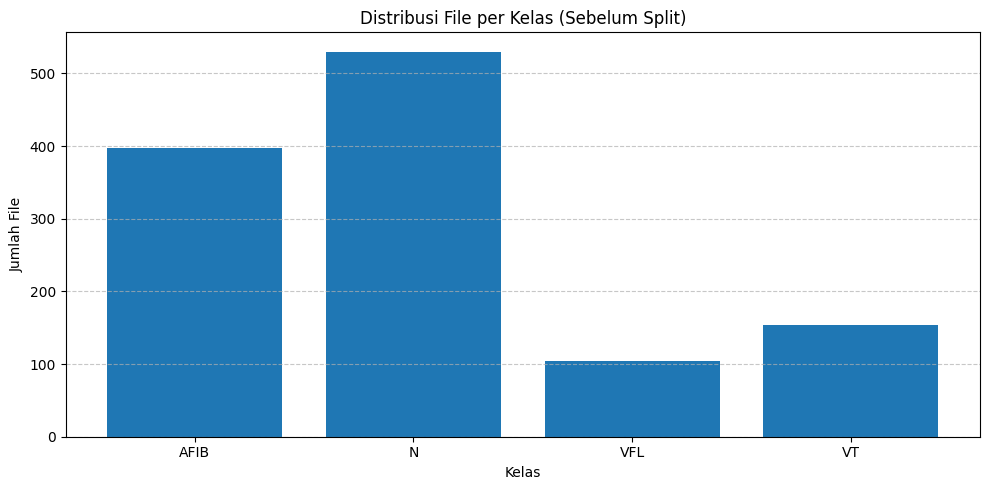

In [12]:
import os
import matplotlib.pyplot as plt

# === PATH FOLDER SUMBER ===
SOURCE_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA\ALL_COMBINED"

# === Cek Distribusi ===
print("📊 Distribusi file per kelas sebelum split:\n")
total_files = 0
class_distribution = {}

for label in sorted(os.listdir(SOURCE_DIR)):
    label_path = os.path.join(SOURCE_DIR, label)
    if not os.path.isdir(label_path):
        continue

    files = [f for f in os.listdir(label_path) if f.endswith(".npy")]
    n_files = len(files)
    total_files += n_files
    class_distribution[label] = n_files
    print(f"  • {label:<10} : {n_files} file")

print(f"\n🔢 Total seluruh file: {total_files}")

# === Visualisasi Diagram Batang ===
if class_distribution:
    labels = list(class_distribution.keys())
    counts = list(class_distribution.values())

    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts)
    plt.title("Distribusi File per Kelas (Sebelum Split)")
    plt.xlabel("Kelas")
    plt.ylabel("Jumlah File")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

📊 Distribusi file per kelas setelah filter ≥10 detik:

  • AFIB      : 366 file valid dari 366 total
  • N         : 390 file valid dari 390 total
  • VFL       : 53 file valid dari 53 total
  • VT        : 56 file valid dari 56 total

✅ Total file valid ≥10 detik: 865
📦 Total seluruh file (termasuk <10 detik): 865


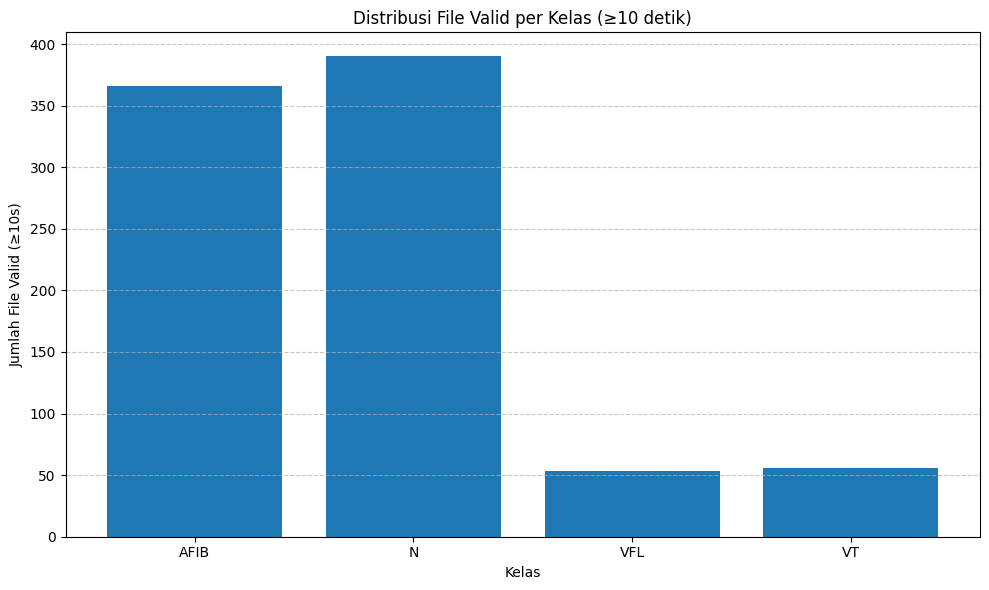

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

# === PATH FOLDER HASIL FILTER 10 DETIK ===
FILTERED_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\RHYTHM_FILTERED_10S"

# === Cek Distribusi ===
print("📊 Distribusi file per kelas setelah filter ≥10 detik:\n")

label_valid_counts = {}
total_files = 0
total_valid = 0

for label in sorted(os.listdir(FILTERED_DIR)):
    label_path = os.path.join(FILTERED_DIR, label)
    if not os.path.isdir(label_path): continue

    valid_count = 0
    files = [f for f in os.listdir(label_path) if f.endswith(".npy")]
    for f in files:
        try:
            sig = np.load(os.path.join(label_path, f))
            if sig.shape[0] >= 3600:  # minimal 10 detik @360Hz
                valid_count += 1
        except Exception as e:
            print(f"[ERROR] {f} gagal dibaca: {e}")

    total_files += len(files)
    total_valid += valid_count
    label_valid_counts[label] = valid_count
    print(f"  • {label:<10}: {valid_count} file valid dari {len(files)} total")

print(f"\n✅ Total file valid ≥10 detik: {total_valid}")
print(f"📦 Total seluruh file (termasuk <10 detik): {total_files}")

# === VISUALISASI ===
if label_valid_counts:
    plt.figure(figsize=(10, 6))
    plt.bar(label_valid_counts.keys(), label_valid_counts.values())
    plt.xlabel("Kelas")
    plt.ylabel("Jumlah File Valid (≥10s)")
    plt.title("Distribusi File Valid per Kelas (≥10 detik)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [3]:
import os
import numpy as np
from tqdm import tqdm

# === PATH SUMBER (FILTERED FILES ≥10s) ===
SOURCE_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\RHYTHM_FILTERED_10S"

# === PATH TUJUAN HASIL SLIDING WINDOW ===
OUTPUT_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\RHYTHM_SLIDED_10S"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === PARAMETER SLIDING WINDOW ===
segment_samples = 3600  # 10 detik @360Hz
stride_samples  = 3600  # tanpa overlap

print("🚀 Memulai proses sliding window...\n")

for label in sorted(os.listdir(SOURCE_DIR)):
    label_path = os.path.join(SOURCE_DIR, label)
    if not os.path.isdir(label_path): continue

    output_label_path = os.path.join(OUTPUT_DIR, label)
    os.makedirs(output_label_path, exist_ok=True)

    for file in tqdm(os.listdir(label_path), desc=f"⏳ {label:10}"):
        if not file.endswith(".npy"): continue

        file_path = os.path.join(label_path, file)
        try:
            signal = np.load(file_path)
            total_len = signal.shape[0]
            if total_len < segment_samples:
                continue

            num_segments = (total_len - segment_samples) // stride_samples + 1
            for i in range(num_segments):
                start = i * stride_samples
                end = start + segment_samples
                segment = signal[start:end]

                output_filename = f"{os.path.splitext(file)[0]}_seg{i:03d}.npy"
                output_path = os.path.join(output_label_path, output_filename)
                np.save(output_path, segment)

        except Exception as e:
            print(f"[ERROR] {file} gagal diproses: {e}")

print("\n✅ Sliding window selesai!")

🚀 Memulai proses sliding window...



⏳ VT        : 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]


✅ Sliding window selesai!


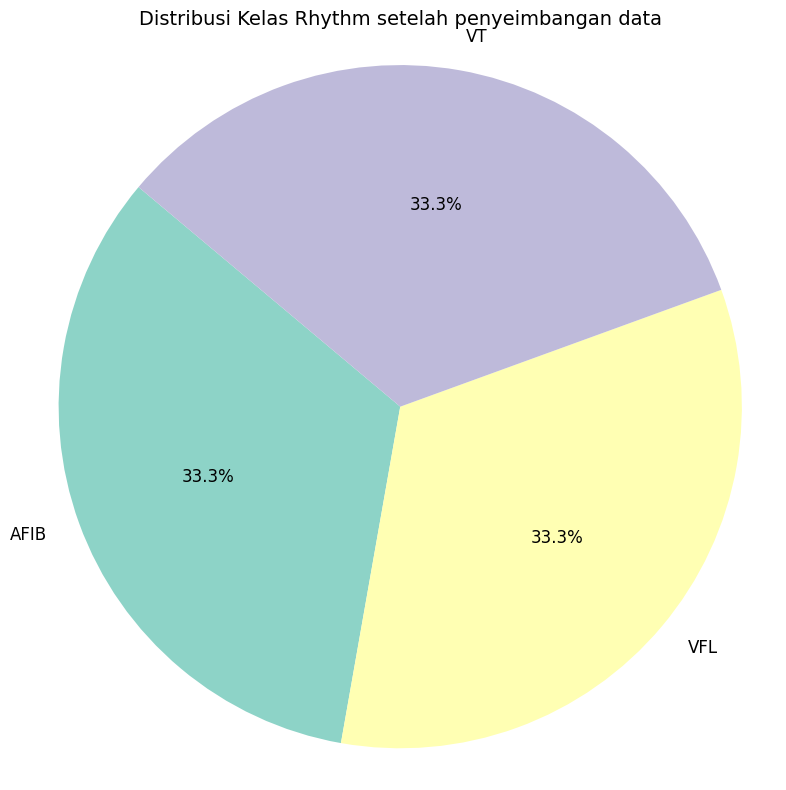

In [ ]:
import matplotlib.pyplot as plt

# === DATA DISTRIBUSI RHYTHM SLIDING WINDOW ===
label_counts = {
    'AFIB': 72875,
    'VFL': 468,
    'VT': 1923
}

labels = list(label_counts.keys())
sizes = list(label_counts.values())

# === WARNA OTOMATIS ===
colors = plt.cm.Set3.colors[:len(labels)]

# === PIE CHART ===
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

plt.title("Distribusi Kelas Rhythm setelah penyeimbangan data", fontsize=14)
plt.axis('equal')  # Biar lingkaran proporsional

plt.tight_layout()
plt.show()

In [10]:
import os
import numpy as np
from tqdm import tqdm

# === PATH SUMBER (HASIL CECG-GAN) ===
SOURCE_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\Hasil_CECG\VT"

# === PATH TUJUAN HASIL SLIDING WINDOW ===
OUTPUT_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\Hasil_CECG_SLIDED10S\VT"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === PARAMETER SLIDING WINDOW ===
segment_samples = 3600  # 5 detik @360Hz
stride_samples  = 3600  # tanpa overlap

print("🚀 Sliding window 5 detik dimulai...\n")

for file in tqdm(os.listdir(SOURCE_DIR), desc="Processing"):
    if not file.endswith(".npy"):
        continue

    file_path = os.path.join(SOURCE_DIR, file)
    try:
        signal = np.load(file_path)
        total_len = signal.shape[0]

        if total_len < segment_samples:
            continue  # Lewati file pendek

        num_segments = (total_len - segment_samples) // stride_samples + 1
        for i in range(num_segments):
            start = i * stride_samples
            end = start + segment_samples
            segment = signal[start:end]

            output_filename = f"{os.path.splitext(file)[0]}_seg{i:03d}.npy"
            output_path = os.path.join(OUTPUT_DIR, output_filename)
            np.save(output_path, segment)

    except Exception as e:
        print(f"[ERROR] {file} gagal diproses: {e}")

print("\n✅ Sliding window 10 detik selesai!")

🚀 Sliding window 5 detik dimulai...



Processing: 100%|██████████| 500/500 [00:13<00:00, 36.12it/s] 


✅ Sliding window 10 detik selesai!


In [9]:
import os
import numpy as np
from tqdm import tqdm

# === PATH SUMBER (HASIL CECG-GAN) ===
SOURCE_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\Hasil_CECG\VFL_2"

# === PATH TUJUAN HASIL SLIDING WINDOW ===
OUTPUT_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\Hasil_CECG_SLIDED10S\VFL"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === PARAMETER SLIDING WINDOW ===
segment_samples = 3600  # 5 detik @360Hz
stride_samples  = 3600  # tanpa overlap

print("🚀 Sliding window 5 detik dimulai...\n")

for file in tqdm(os.listdir(SOURCE_DIR), desc="Processing"):
    if not file.endswith(".npy"):
        continue

    file_path = os.path.join(SOURCE_DIR, file)
    try:
        signal = np.load(file_path)
        total_len = signal.shape[0]

        if total_len < segment_samples:
            continue  # Lewati file pendek

        num_segments = (total_len - segment_samples) // stride_samples + 1
        for i in range(num_segments):
            start = i * stride_samples
            end = start + segment_samples
            segment = signal[start:end]

            output_filename = f"{os.path.splitext(file)[0]}_seg{i:03d}.npy"
            output_path = os.path.join(OUTPUT_DIR, output_filename)
            np.save(output_path, segment)

    except Exception as e:
        print(f"[ERROR] {file} gagal diproses: {e}")

print("\n✅ Sliding window 10 detik selesai!")


🚀 Sliding window 5 detik dimulai...



Processing: 100%|██████████| 500/500 [00:04<00:00, 110.11it/s]


✅ Sliding window 10 detik selesai!


In [ ]:
import os

# === PATH FOLDER SLIDING WINDOW VT dan VFL ===
VT_PATH  = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\Hasil_CECG_SLIDED\VT"
VFL_PATH = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\Hasil_CECG_SLIDED10s\VFL"

def count_npy_files(folder_path):
    if not os.path.exists(folder_path):
        return 0
    return len([f for f in os.listdir(folder_path) if f.endswith(".npy")])

# Hitung jumlah file
vt_count  = count_npy_files(VT_PATH)
vfl_count = count_npy_files(VFL_PATH)

# Tampilkan hasil
print("📊 Distribusi file hasil sliding window:\n")
print(f"  • VT  : {vt_count} file")
print(f"  • VFL : {vfl_count} file")
print(f"\n📦 Total file gabungan VT + VFL: {vt_count + vfl_count}")

📊 Distribusi file hasil sliding window:

  • VT  : 2000 file
  • VFL : 2000 file

📦 Total file gabungan VT + VFL: 4000


In [23]:
import os
import shutil
import random

# === PATH SUMBER ===
SOURCE_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\RHYTHM_SLIDED_10S"

# === PATH TUJUAN SPLIT ===
OUTPUT_BASE = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\DATASET_SPLIT_FINAL"
TRAIN_DIR = os.path.join(OUTPUT_BASE, "train")
TEST_DIR  = os.path.join(OUTPUT_BASE, "test")

# === KONFIGURASI ===
N_TEST = 400
MAX_TRAIN = 2000

print(f"🚀 Mulai split ke folder baru: {N_TEST} test + max {MAX_TRAIN} train per kelas\n")

for label in sorted(os.listdir(SOURCE_DIR)):
    label_path = os.path.join(SOURCE_DIR, label)
    if not os.path.isdir(label_path): continue

    # Buat folder tujuan
    train_label_dir = os.path.join(TRAIN_DIR, label)
    test_label_dir  = os.path.join(TEST_DIR, label)
    os.makedirs(train_label_dir, exist_ok=True)
    os.makedirs(test_label_dir, exist_ok=True)

    # Ambil semua file dan acak
    files = [f for f in os.listdir(label_path) if f.endswith(".npy")]
    random.shuffle(files)

    # Split test dan train
    test_files  = files[:N_TEST]
    train_pool  = files[N_TEST:]
    train_files = train_pool if len(train_pool) <= MAX_TRAIN else random.sample(train_pool, MAX_TRAIN)

    # Salin file test
    for f in test_files:
        shutil.copy2(
            os.path.join(label_path, f),
            os.path.join(test_label_dir, f)
        )

    # Salin file train
    for f in train_files:
        shutil.copy2(
            os.path.join(label_path, f),
            os.path.join(train_label_dir, f)
        )

    print(f"📁 {label:<10}: test = {len(test_files)}, train = {len(train_files)}")

print("\n✅ Proses split selesai. Data disimpan di:", OUTPUT_BASE)

🚀 Mulai split ke folder baru: 400 test + max 2000 train per kelas

📁 AFIB      : test = 400, train = 1600
📁 N         : test = 400, train = 1600
📁 VFL       : test = 400, train = 68
📁 VT        : test = 400, train = 1523

✅ Proses split selesai. Data disimpan di: D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\DATASET_SPLIT_FINAL


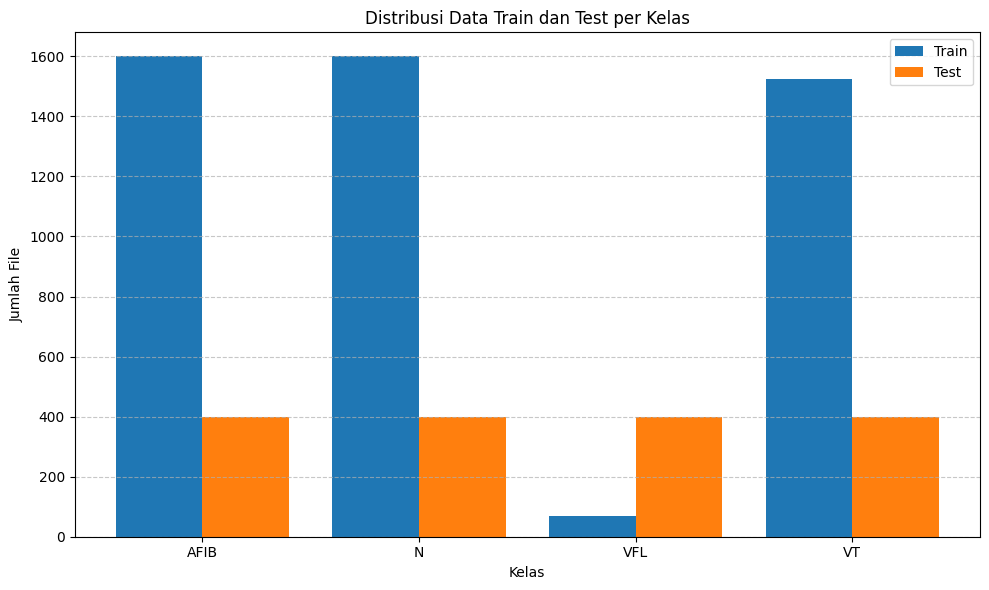

In [20]:
import os
import matplotlib.pyplot as plt

# === PATH HASIL SPLIT ===
BASE_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\DATASET_SPLIT_FINAL"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
TEST_DIR  = os.path.join(BASE_DIR, "test")

# === Fungsi hitung jumlah file per kelas ===
def count_files_per_class(folder_path):
    class_counts = {}
    for label in sorted(os.listdir(folder_path)):
        label_path = os.path.join(folder_path, label)
        if not os.path.isdir(label_path): continue
        count = len([f for f in os.listdir(label_path) if f.endswith(".npy")])
        class_counts[label] = count
    return class_counts

# === Hitung distribusi ===
train_counts = count_files_per_class(TRAIN_DIR)
test_counts  = count_files_per_class(TEST_DIR)
all_labels = sorted(set(train_counts.keys()).union(test_counts.keys()))

train_values = [train_counts.get(label, 0) for label in all_labels]
test_values  = [test_counts.get(label, 0) for label in all_labels]

# === Plot ===
x = range(len(all_labels))
plt.figure(figsize=(10, 6))
plt.bar(x, train_values, width=0.4, label="Train", align='center')
plt.bar([i + 0.4 for i in x], test_values, width=0.4, label="Test", align='center')

plt.xticks([i + 0.2 for i in x], all_labels)
plt.xlabel("Kelas")
plt.ylabel("Jumlah File")
plt.title("Distribusi Data Train dan Test per Kelas")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
import os
import shutil
import random

# === PATH FOLDER DATA TRAIN YANG SUDAH ADA ===
TRAIN_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\DATASET_SPLIT_FINAL\train"

# === FOLDER SUMBER FILE GAN ===
GAN_DIRS = {
    "VT": r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\Hasil_CECG_SLIDED\VT",
    "VFL": r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\Hasil_CECG_SLIDED\VFL"
}

# === PARAMETER TARGET TRAIN ===
MAX_TRAIN = 1600

# === Proses Penambahan File GAN ===
for label in ["VT", "VFL"]:
    train_path = os.path.join(TRAIN_DIR, label)
    gan_path = GAN_DIRS[label]

    if not os.path.exists(train_path) or not os.path.exists(gan_path):
        print(f"❌ Folder tidak ditemukan untuk {label}")
        continue

    # Hitung jumlah file yang sudah ada di train
    existing_files = [f for f in os.listdir(train_path) if f.endswith(".npy")]
    num_existing = len(existing_files)

    # Hitung kekurangan
    num_to_add = MAX_TRAIN - num_existing
    if num_to_add <= 0:
        print(f"✅ {label}: sudah {num_existing} file, tidak perlu ditambah.")
        continue

    # Ambil file dari GAN secara acak
    gan_files = [f for f in os.listdir(gan_path) if f.endswith(".npy")]
    selected_gan_files = random.sample(gan_files, min(num_to_add, len(gan_files)))

    # Salin file ke folder train
    for f in selected_gan_files:
        shutil.copy2(os.path.join(gan_path, f), os.path.join(train_path, f))

    print(f"➕ {label}: tambah {len(selected_gan_files)} file dari GAN → total sekarang {num_existing + len(selected_gan_files)}")

print("\n✅ Proses penambahan file train dari GAN selesai.")

➕ VT: tambah 77 file dari GAN → total sekarang 1600
➕ VFL: tambah 1532 file dari GAN → total sekarang 1600

✅ Proses penambahan file train dari GAN selesai.


📊 Distribusi file setelah digabung:

  • AFIB      : train = 1600, test =  400, total = 2000
  • N         : train = 1600, test =  400, total = 2000
  • VFL       : train = 1600, test =  400, total = 2000
  • VT        : train = 1600, test =  400, total = 2000


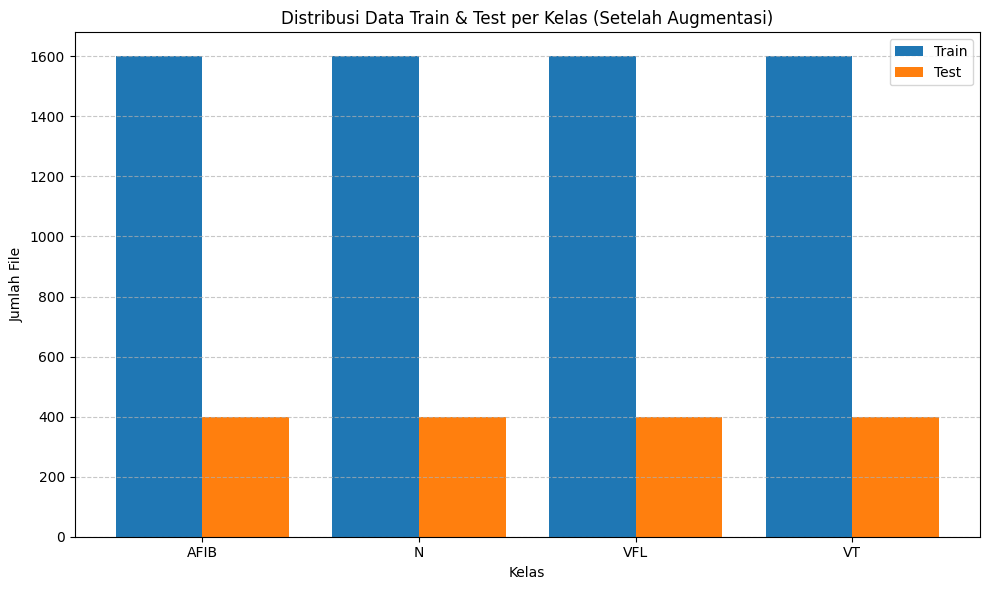

In [26]:
import os
import matplotlib.pyplot as plt

# === PATH DATASET SPLIT (SETELAH GABUNG GAN) ===
BASE_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\DATASET_SPLIT_FINAL"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
TEST_DIR  = os.path.join(BASE_DIR, "test")

def count_npy_per_class(folder):
    class_counts = {}
    for label in sorted(os.listdir(folder)):
        label_path = os.path.join(folder, label)
        if not os.path.isdir(label_path): continue
        count = len([f for f in os.listdir(label_path) if f.endswith(".npy")])
        class_counts[label] = count
    return class_counts

# === Hitung distribusi ===
train_counts = count_npy_per_class(TRAIN_DIR)
test_counts  = count_npy_per_class(TEST_DIR)
all_labels   = sorted(set(train_counts.keys()).union(test_counts.keys()))

# === Tampilkan di terminal ===
print("📊 Distribusi file setelah digabung:\n")
for label in all_labels:
    train = train_counts.get(label, 0)
    test  = test_counts.get(label, 0)
    print(f"  • {label:<10}: train = {train:>4}, test = {test:>4}, total = {train + test}")

# === Visualisasi Bar Chart ===
train_values = [train_counts.get(label, 0) for label in all_labels]
test_values  = [test_counts.get(label, 0) for label in all_labels]

x = range(len(all_labels))
plt.figure(figsize=(10, 6))
plt.bar(x, train_values, width=0.4, label="Train", align='center')
plt.bar([i + 0.4 for i in x], test_values, width=0.4, label="Test", align='center')

plt.xticks([i + 0.2 for i in x], all_labels)
plt.xlabel("Kelas")
plt.ylabel("Jumlah File")
plt.title("Distribusi Data Train & Test per Kelas (Setelah Augmentasi)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

📂 Menampilkan 1 file per kelas dari: D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\Hasil_CECG_SLIDED10S



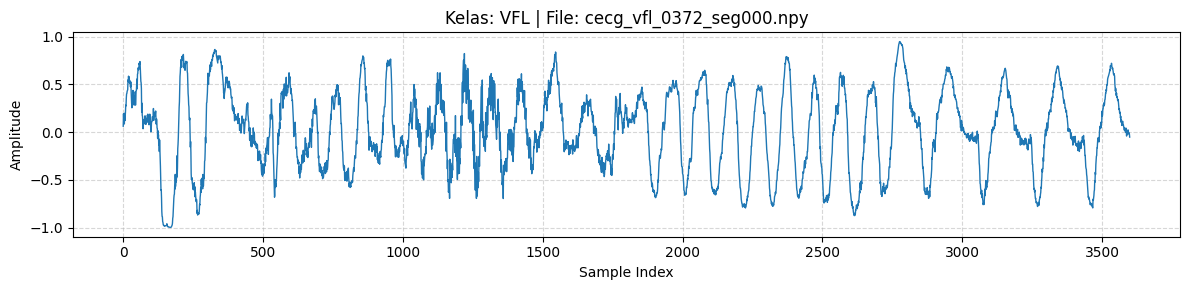

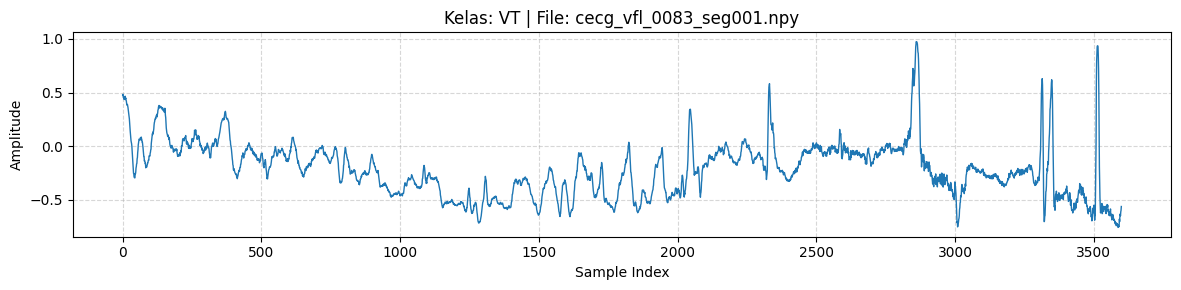

In [11]:
# Contoh pemanggilan
visualize_ecg_per_class(
    root_dir=r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\Hasil_CECG_SLIDED10S",  # Ganti ke path kamu
    samples_per_class=1,
    random_choice=True,
    show_title_with_name=True
)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from pathlib import Path

def visualize_ecg_per_class(
    root_dir,
    samples_per_class=2,
    random_choice=True,
    show_title_with_name=True,
    figsize=(12, 3)
):
    """
    Visualisasi sinyal ECG dari beberapa kelas dalam satu folder.

    Parameters:
    - root_dir (str): Folder utama yang berisi subfolder per kelas.
    - samples_per_class (int): Jumlah file yang ingin ditampilkan per kelas.
    - random_choice (bool): Jika True, pilih file secara acak. Jika False, ambil dari awal.
    - show_title_with_name (bool): Jika True, judul plot akan menampilkan nama file.
    - figsize (tuple): Ukuran gambar matplotlib.
    """
    root_path = Path(root_dir)
    class_folders = [d for d in root_path.iterdir() if d.is_dir()]
    
    if not class_folders:
        print(f"❌ Tidak ditemukan subfolder kelas dalam folder: {root_dir}")
        return

    print(f"📂 Menampilkan {samples_per_class} file per kelas dari: {root_dir}\n")

    for class_folder in sorted(class_folders):
        class_name = class_folder.name
        npy_files = sorted([f for f in class_folder.glob("*.npy")])
        
        if not npy_files:
            print(f"⚠️  Tidak ada file .npy di kelas {class_name}")
            continue
        
        selected_files = random.sample(npy_files, min(samples_per_class, len(npy_files))) if random_choice else npy_files[:samples_per_class]
        
        for fpath in selected_files:
            try:
                signal = np.load(fpath)
                plt.figure(figsize=figsize)
                plt.plot(signal, linewidth=1)
                title = f"Kelas: {class_name}"
                if show_title_with_name:
                    title += f" | File: {fpath.name}"
                plt.title(title)
                plt.xlabel("Sample Index")
                plt.ylabel("Amplitude")
                plt.grid(True, linestyle="--", alpha=0.5)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"❌ Gagal membuka {fpath.name}: {e}")

📊 Distribusi file hasil sliding window per kelas:

  • AFIB      : 2000 file
  • N         : 2000 file
  • VFL       : 468 file
  • VT        : 1923 file

📦 Total seluruh file hasil sliding window: 6391 file


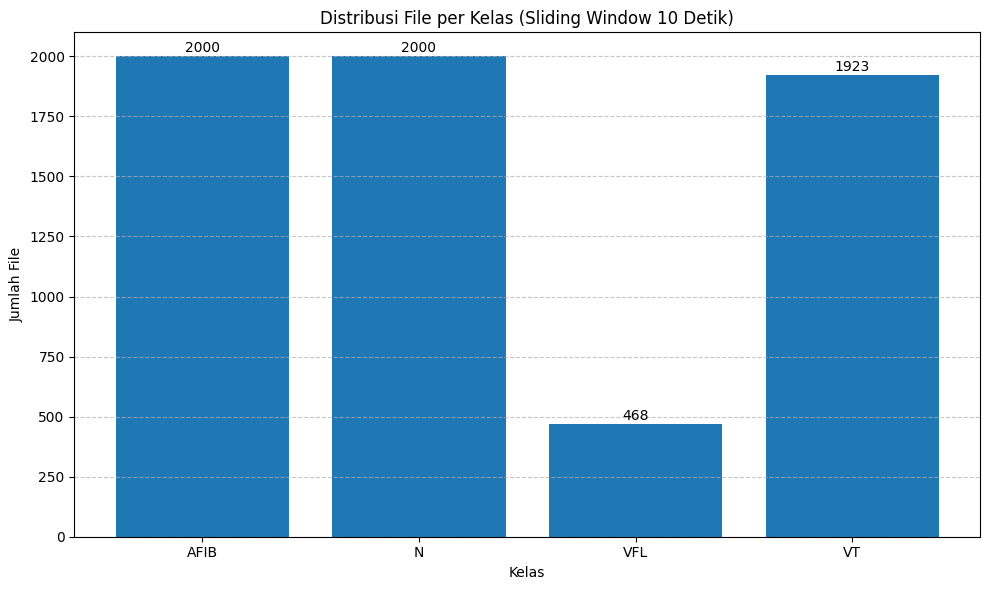

In [1]:
import os
import matplotlib.pyplot as plt

# === PATH FOLDER HASIL SLIDING WINDOW ===
SLIDED_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA_FINAL\RHYTHM_SLIDED_10S"

print("📊 Distribusi file hasil sliding window per kelas:\n")

label_counts = {}
total_files = 0

# === Hitung jumlah file per kelas ===
for label in sorted(os.listdir(SLIDED_DIR)):
    label_path = os.path.join(SLIDED_DIR, label)
    if not os.path.isdir(label_path):
        continue

    files = [f for f in os.listdir(label_path) if f.endswith(".npy")]
    count = len(files)
    label_counts[label] = count
    total_files += count

    print(f"  • {label:<10}: {count} file")

print(f"\n📦 Total seluruh file hasil sliding window: {total_files} file")

# === VISUALISASI BAR CHART ===
plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Kelas")
plt.ylabel("Jumlah File")
plt.title("Distribusi File per Kelas (Sliding Window 10 Detik)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan angka di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

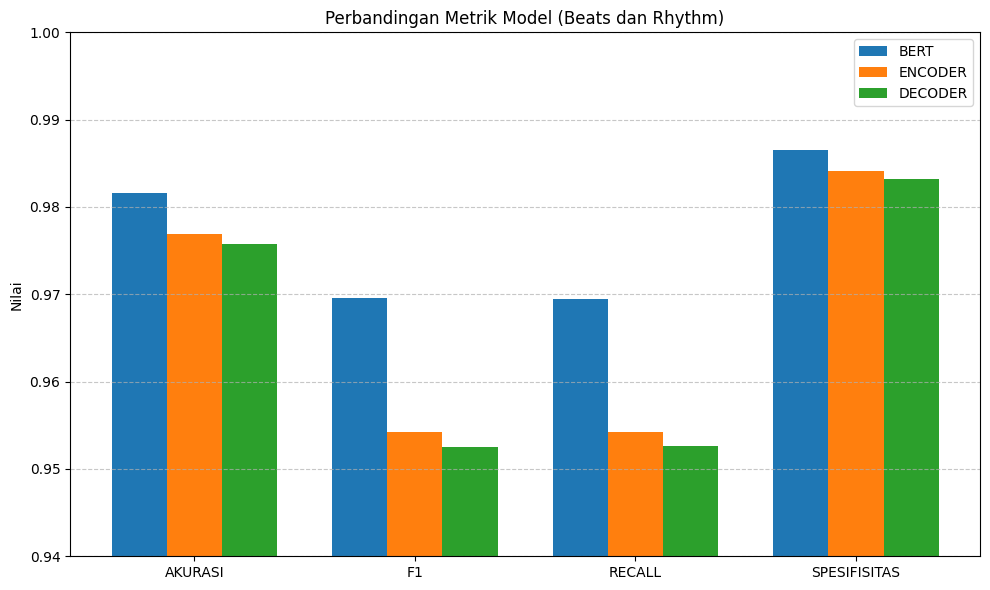

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    "MATRIK": ["AKURASI", "F1", "RECALL", "SPESIFISITAS"],
    "BERT": [0.981579, 0.9695685, 0.9694673806, 0.98653325],
    "ENCODER": [0.9769464444, 0.9542156667, 0.9541920386, 0.9841198333],
    "DECODER": [0.9757375556, 0.9525483333, 0.952596248, 0.9831821667]
}

# Buat DataFrame
df = pd.DataFrame(data)
metrik = df["MATRIK"]
x = np.arange(len(metrik))  # posisi label
width = 0.25  # lebar bar

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width, df["BERT"], width, label='BERT')
plt.bar(x, df["ENCODER"], width, label='ENCODER')
plt.bar(x + width, df["DECODER"], width, label='DECODER')

# Label dan judul
plt.xticks(x, metrik)
plt.ylim(0.94, 1.0)
plt.ylabel("Nilai")
plt.title("Perbandingan Metrik Model (Beats dan Rhythm)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

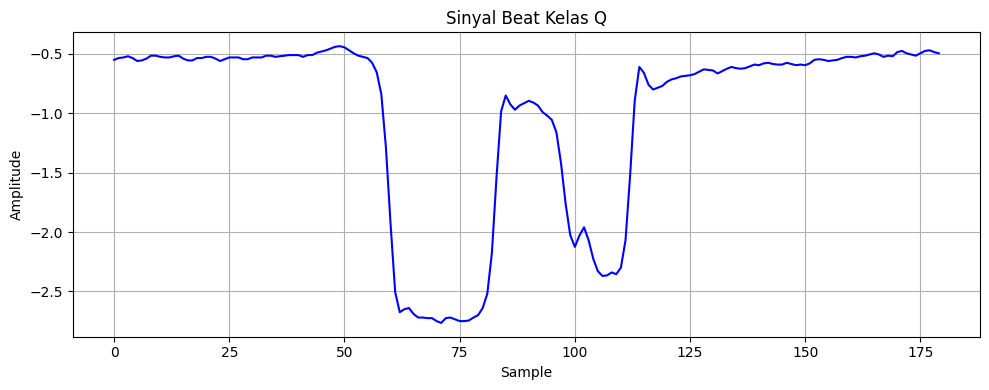

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === PATH FOLDER DATA ===
KELAS = 'Q'  # Ganti dengan L, R, V, atau Q sesuai kebutuhan
DATA_DIR = r'D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\TA\TA_SKRIPSI_GUE\DATA\output_coba\SPLIT_BEATS_NPY\train'  # ganti dengan path aslimu
FOLDER_PATH = os.path.join(DATA_DIR, KELAS)

# === BACA 1 FILE SAJA SECARA ACAR (contoh pertama)
file_list = os.listdir(FOLDER_PATH)
file_list = [f for f in file_list if f.endswith('.npy')]

if len(file_list) == 0:
    print(f"Tidak ada file .npy di folder {FOLDER_PATH}")
else:
    first_file = os.path.join(FOLDER_PATH, file_list[0])
    sinyal = np.load(first_file)

    # === TAMPILKAN VISUALISASI ===
    plt.figure(figsize=(10, 4))
    plt.plot(sinyal, color='blue')
    plt.title(f'Sinyal Beat Kelas {KELAS}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()